In [2]:
import ipywidgets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def init_plot():
    plt.figure(figsize=(9, 9), dpi=80, facecolor='w', edgecolor='k')
    plt.ylim(-1.0, 4.0)
    plt.grid(True, which='both', color='lightblue', linestyle="dotted")
    plt.axhline(y=0, color='lightgrey', linestyle="dashed")
    plt.axvline(x=0, color='lightgrey', linestyle="dashed")
    return plt

def plot_vec(v, color = 'k'):
    plt.arrow(origin[0], origin[1], v[0], v[1], color=color, width=0.018, length_includes_head=True)
    plt.arrow(-v[0], -v[1], v[0], v[1], color=color, width=0.015, length_includes_head=True, linestyle='--')

def determinant(a, b, c, d):
    return a * d - c * b

def distance(a, b):
    x = a[0] - b[0]
    y = a[1] - b[1]
    return np.hypot(x, y)

def line_distance(a):
    return distance([a[0], a[1]], [a[2], a[3]])

def line_normal(a):
    [ax, ay, bx, by] = a
    x = bx - ax
    y = by - ay
    return vec_normal([x, y])

def vec_normal(a):
    [x, y] = a
    length = np.hypot(x, y)
    return [x / length, y / length]

# Takes vec objects for the start and end of lines from a to b and c to d
# Returns point of intersection, assuming infinitely long lines
def vec_lines_intersection(va, vb, vc, vd):
    denominator = determinant(
            va[0] - vb[0], va[1] - vb[1],
            vc[0] - vd[0], vc[1] - vd[1]
        )
    if(denominator == 0):
        return None    
    determinant_axaybxby = determinant(va[0], va[1], vb[0], vb[1])
    determinant_cxcydxdy = determinant(vc[0], vc[1], vd[0], vd[1])
    x = determinant(
            determinant_axaybxby, va[0] - vb[0],
            determinant_cxcydxdy, vc[0] - vd[0]
        ) / denominator
    y = determinant(
            determinant_axaybxby, va[1] - vb[1],
            determinant_cxcydxdy, vc[1] - vd[1]
        ) / denominator
    return [x, y]

# Takes two lists for start and end of lines a and b where each is a list like [x1, y1, x2, y2]
def list_lines_intersection(a, b):
    return vec_lines_intersection([a[0], a[1]], [a[2], a[3]], [b[0], b[1]], [b[2], b[3]])



# Deflection Angle of 2D Vectors

Angle between two vectors $u$ and $v$ is $$ cos(\theta) = {u \cdot v \over{|u| |v|}}$$


('theta_a', 0.6283185307179586)
('theta_b', 2.356194490192345)
('theta_diff', 1.7278759594743862)
('theta_intersect', -1.0995574287564276)


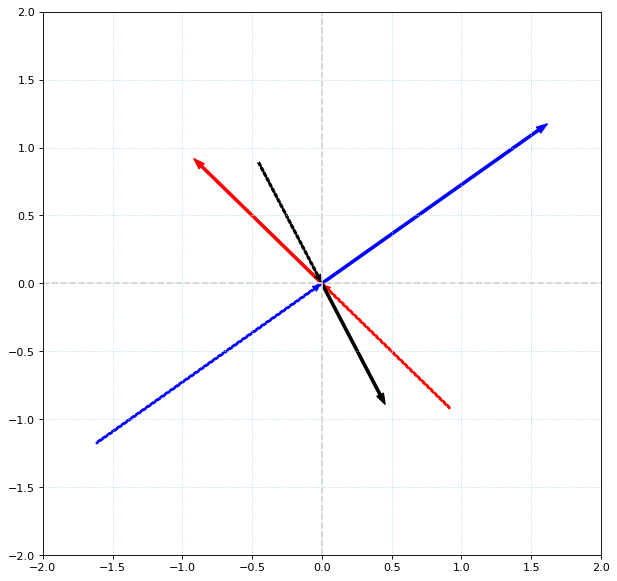

In [12]:
plt = init_plot()
plt.xlim(-2, 2)
plt.ylim(-2, 2)

origin = np.zeros(2)
theta_a = np.pi * 1/5
a = np.array([np.cos(theta_a) * 2, np.sin(theta_a) * 2])
theta_b = np.pi * 3/4
b = np.array([np.cos(theta_b) * 1.3, np.sin(theta_b) * 1.3])

c = np.add(a, b)
d = np.subtract(a, b)

dotp = np.dot(a, b)

theta_diff = np.arccos(
    dotp /
    (np.hypot(a[0], a[1]) * np.hypot(b[0], b[1]))
)

theta_intersect = theta_a + theta_a - theta_b

print('theta_a', theta_a)
print('theta_b', theta_b)
print('theta_diff', theta_diff)
print('theta_intersect', theta_intersect)

e = np.array([np.cos(theta_intersect), np.sin(theta_intersect)])

plot_vec(a, 'b')
plot_vec(b, 'r')
plot_vec(e, 'k')

# Line Intersection

b line length: 0.583095 | start of b to gb intersection 0.145774 | start of b to rb intersection 1.301794
b does intersect g
b does not intersect r


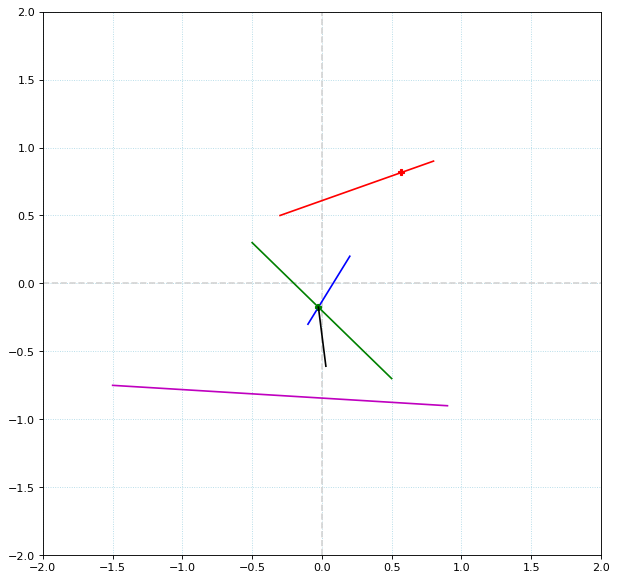

In [7]:
plt = init_plot()
plt.xlim(-2, 2)
plt.ylim(-2, 2)

b_line = [-0.1, -0.3, 0.2, 0.2]
plt.plot(b_line[::2], b_line[1::2], '-b')

g_line = [-0.5, 0.3, 0.5, -0.7]
plt.plot(g_line[::2], g_line[1::2], '-g')

r_line = [-0.3, 0.5, 0.8, 0.9]
plt.plot(r_line[::2], r_line[1::2], '-r')

m_line = [-1.5, -0.75, 0.9, -0.9]
plt.plot(m_line[::2], m_line[1::2], '-m')

pt_gb = list_lines_intersection(g_line, b_line)
plt.plot([pt_gb[0]], [pt_gb[1]], 'Pg')

pt_rb = list_lines_intersection(r_line, b_line)
plt.plot([pt_rb[0]], [pt_rb[1]], 'Pr')

b_line_len = line_distance(b_line)
b_to_gb_len = distance(b_line, pt_gb)
b_to_rb_len = distance(b_line, pt_rb)

b_remain = b_line_len - b_to_gb_len

print("b line length: %f | start of b to gb intersection %f | start of b to rb intersection %f" % \
         (b_line_len, b_to_gb_len, b_to_rb_len))

if b_line_len > b_to_gb_len:
    print("b does intersect g")
else:
    print("b does not intersect g")

if b_line_len > b_to_rb_len:
    print("b does intersect r")
else:
    print("b does not intersect r")
    
bg_deflection_vec = vec_normal(np.subtract(line_normal(g_line), line_normal(b_line)))

bg_deflection_line = [pt_gb[0], pt_gb[1],
                      (bg_deflection_vec[0] * b_remain) + pt_gb[0],
                      (bg_deflection_vec[1] * b_remain) + pt_gb[1]
                     ]

plt.plot(bg_deflection_line[::2], bg_deflection_line[1::2], '-k')

With parallel lines...

In [8]:
print(list_lines_intersection([1, 1, 2, 2], [3, 3, 4, 4]))

None


# Parabola: $ y = (x + h)^2 + k $

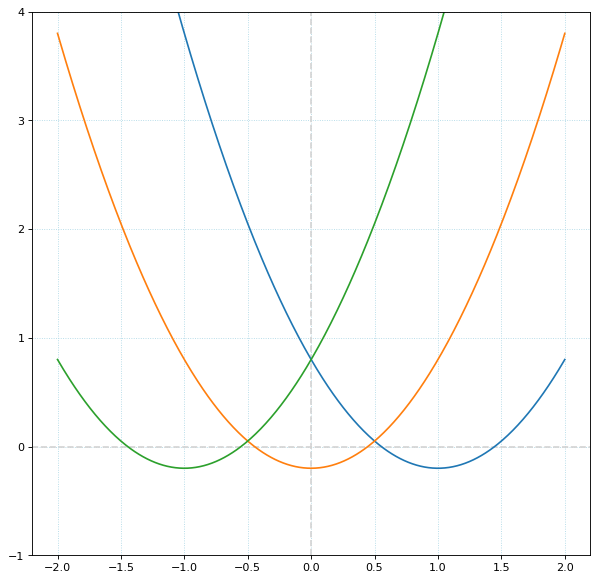

In [9]:
x = np.linspace(-2, 2, 500)
h = np.linspace(-1, 1, 3)
k = -0.2

p = init_plot()
for _h in h:
    p.plot(x, pow(x + _h, 2) + k, '-')

## Trig Functions

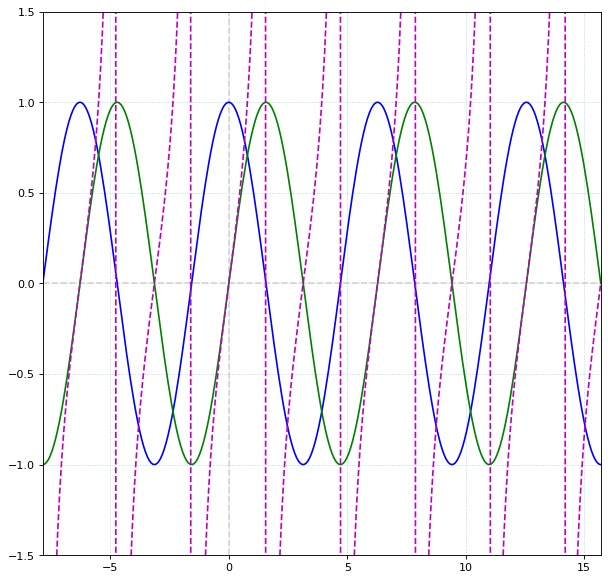

In [10]:
x = np.linspace(-np.pi * 2.5, np.pi * 5, 300)

p = init_plot()
p.xlim(-np.pi * 2.5, np.pi * 5)
p.ylim(-1.5, 1.5)
p.plot(x, np.cos(x), '-b')
p.plot(x, np.sin(x), '-g')
p.plot(x, np.tan(x), '--m')


In [11]:
1.4142135623730951 * 1.4142135623730951

2.0000000000000004

In [23]:
sq = np.sqrt(.5)

In [24]:
sq * sq + sq * sq

1.0000000000000002